In [2]:
import numpy as np
import os
import cv2
import sys
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
ROOT_DIR = os.path.abspath('../find_cross_pattern/')
#sys.path.append(os.path.join(ROOT_DIR,'images/'))
IMG_DIR = os.path.join(ROOT_DIR,'pics\\')
IMG_PATH = os.path.join(IMG_DIR,'test.jpg')


(2160, 3840, 3)


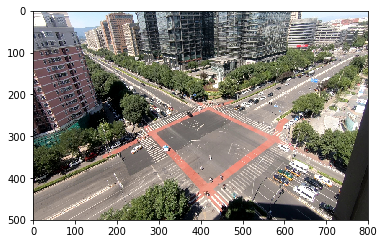

In [5]:
img = cv2.imread(IMG_PATH,1)
print(img.shape)
img=cv2.resize(img,(800,500),interpolation=cv2.INTER_CUBIC)
img_mat = img[:,:,::-1] 
plt.imshow(img_mat)


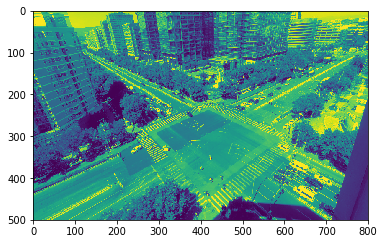

In [122]:
image = img
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

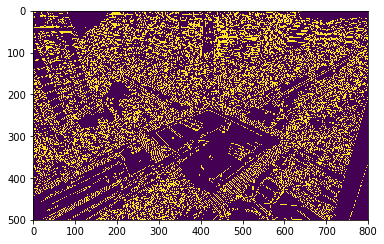

In [123]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
plt.imshow(edges)

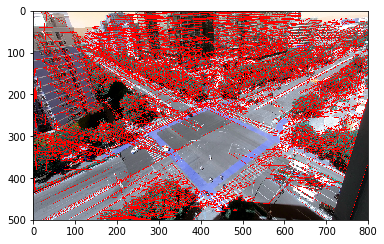

In [124]:
#hough transform
lines = cv2.HoughLinesP(edges,1,np.pi/180,30,minLineLength=60,maxLineGap=10)
lines1 = lines[:,0,:]
for x1,y1,x2,y2 in lines1[:]: 
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),1)

plt.imshow(img)

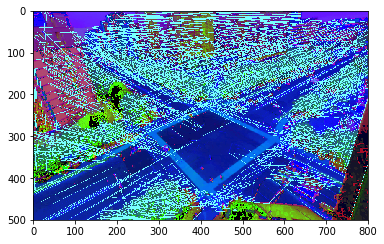

In [125]:
hsi_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsi_img)

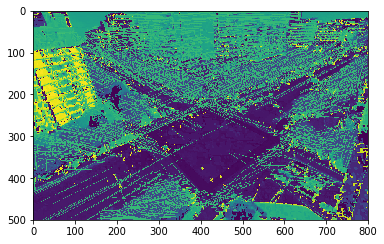

In [126]:
h_hsi_img = hsi_img[:,:,0]
plt.imshow(h_hsi_img)

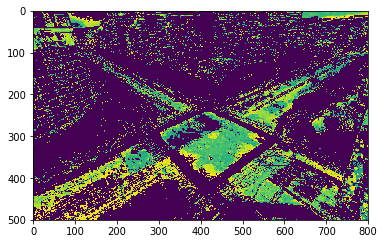

In [130]:
s_hsi_img = hsi_img[:,:,1]
part = s_hsi_img
part[part<20] = 0
part[part>40] = 0
plt.imshow(part)


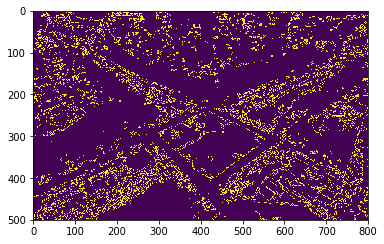

In [132]:
edge = cv2.Canny(part, 50, 150, apertureSize=3)
plt.imshow(edge)

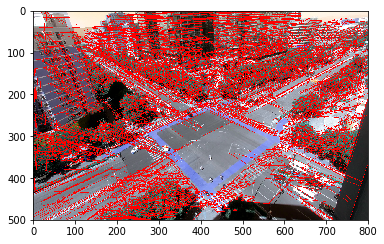

In [137]:
lines2 = cv2.HoughLinesP(edge,1,np.pi/180,30,minLineLength=100,maxLineGap=10)
lines3 = lines2[:,0,:]
for x1,y1,x2,y2 in lines3[:]: 
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),1)

plt.imshow(img)